In [1]:
import pandas as pd

rossman_ml = pd.read_parquet("data.dataset.parquet")
rossman_ml.head()


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Scored Labels
0,349,2,2014-02-18 00:00:00+00:00,8019,840,1,1,0,0,8596.143359
1,977,1,2015-06-22 00:00:00+00:00,3931,445,1,0,0,0,4323.939959
2,691,1,2013-05-13 00:00:00+00:00,11277,787,1,1,0,0,10123.698451
3,714,5,2013-11-22 00:00:00+00:00,4780,339,1,1,0,0,4826.603893
4,326,1,2015-03-30 00:00:00+00:00,7860,537,1,1,0,1,7067.290690


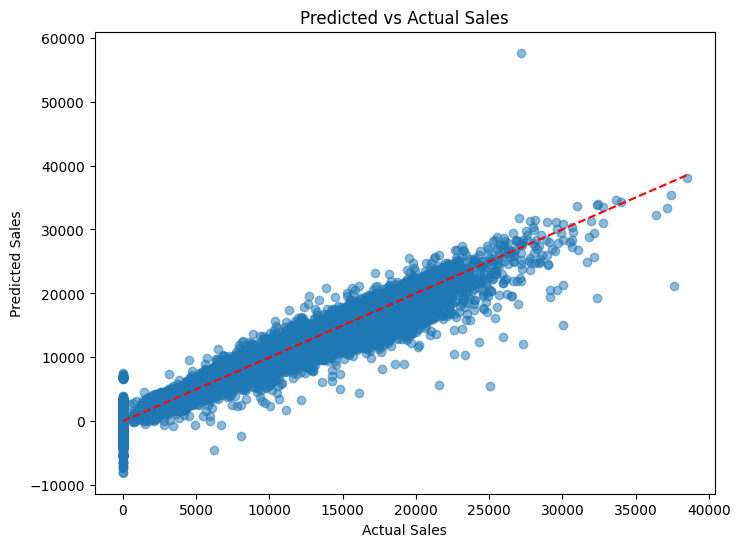

In [2]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))

# Scatter plot
plt.scatter(rossman_ml['Sales'], rossman_ml['Scored Labels'], alpha=0.5)

# Labels and title
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Predicted vs Actual Sales')

# Diagonal line for perfect prediction
plt.plot([rossman_ml['Sales'].min(), rossman_ml['Sales'].max()],
         [rossman_ml['Sales'].min(), rossman_ml['Sales'].max()],
         color='red', linestyle='--')

plt.show()


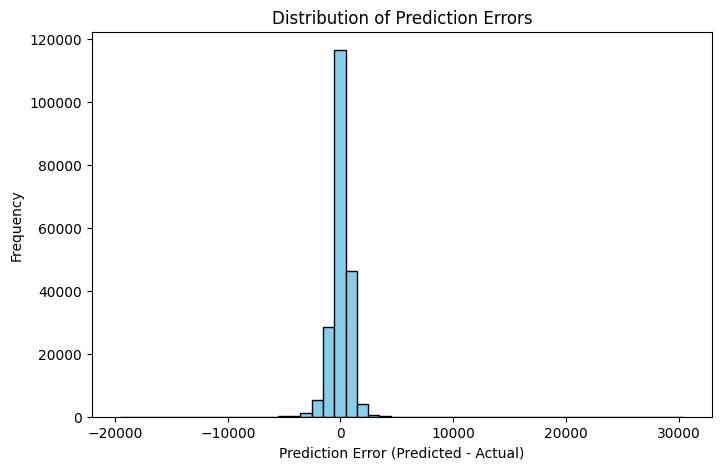

In [3]:
# Compute errors
rossman_ml['error'] = rossman_ml['Scored Labels'] - rossman_ml['Sales']

plt.figure(figsize=(8,5))
plt.hist(rossman_ml['error'], bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Prediction Error (Predicted - Actual)')
plt.ylabel('Frequency')
plt.title('Distribution of Prediction Errors')
plt.show()


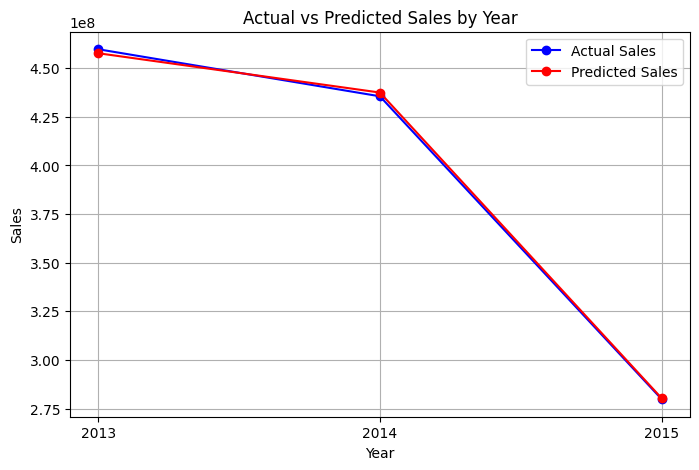

In [5]:
rossman_ml['Year'] = rossman_ml['Date'].dt.year
annual_sales = rossman_ml.groupby('Year').agg({
    'Sales': 'sum',             # total actual sales per year
    'Scored Labels': 'sum'      # total predicted sales per year
}).reset_index()


import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))

plt.plot(annual_sales['Year'], annual_sales['Sales'], label='Actual Sales', color='blue', marker='o')
plt.plot(annual_sales['Year'], annual_sales['Scored Labels'], label='Predicted Sales', color='red', marker='o')

plt.xlabel('Year')
plt.ylabel('Sales')
plt.title('Actual vs Predicted Sales by Year')
plt.xticks(annual_sales['Year'])  # ensures only years appear on X-axis
plt.legend()
plt.grid(True)
plt.show()
